 <h4>Author: Mr. Chandramohan Reddy ANKIREDDYPALLI &nbsp;&nbsp; &nbsp; &nbsp;Email: chandramohanreddyab@gmail.com &nbsp;&nbsp; &nbsp; &nbsp; Contact: +33 766 785 789</h4>   

## EDA, KPI, and ML Model for Trivago Marketing Data

### Table of Contents:
> **[Business Problem](#id1)**  
> **[Understanding Dataset ](#id2)**  
> **[Explorative Data Analysis](#id3)**    
> **[Notes on New Bidding Algorithm For AU market](#id4)**   
> **[Hypotheses and Click Out Revenue Prediction ML Algorithm For AU market](#id5)**  
> **[Bidding Price Forecasting ML Algorithm For AU market](#id6)**   
> **[Optional notes](#id7)** 

### Business Understanding:
<div id="id1"></div>

**Marketing strategy is a long-term, forward-looking approach and an overall game plan of any organization or any business with the fundamental goal of achieving a sustainable competitive advantage by understanding the needs and wants of customers.** <br>

**Marketing Analytics helps businesses to understand how marketing campaigns are performing as part of Marketing strategies. Marketing analytics play a vital role to understand** <br>
- **Campaign Goals & KPIs for the respective campaign**
- **Budget Optimization for a campaign,and ROI**
- **Campaign Content-Format such gifs, videos, or just images**
- **Channels to promote campaigns**


**Trivago is a transnational technology company specializing in internet-related services and products in the hotel, lodging and metasearch fields. Trivago run Randomized Control Trials, geo experiments and pre-post tests to understand current market needs and demands and store the data in an internal database**

**Understanding this data using explorative data analysis, visualizations, statistical, and machine learning help Marketing strategists, Organization leaders to make sure Trivago meets market demands, customer expectations, and expected growth rate**

### Let's Understand Dataset:
<div id="id2"></div>

In [1]:
# import necessary libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve,ShuffleSplit

In [2]:
#reading Data Set
raw_data=pd.read_csv('case_study_marketing_20210201/case_study_marketing_20210201.csv')
data=raw_data.copy()
data.head(3)

,ymd,market_code,account_id,pub_campaign_id,pub_adgroup_id,pub_keyword_id,keyword_name,pub_device,match_type,theme_name_english,replacement_type_name,impressions,clickins,cost,clickout,bookings,clickout_rev,booking_amount,users_engagement
0,20200905,DE,321,11312819993,114584083847,4729772737,neos marmaras hotels,phone,0,Hotel,City,1,0,0,0,0.0,0,0.0,490
1,20200905,DE,515,180791594,3133140280,76004101942085,altstadt florenz,desktop,0,HotelsHistoricCity,City,1,0,0,0,0.0,0,0.0,455
2,20200905,UK,505,180388254,1211662269993764,75729226461556,+apartment +wigan,desktop,2,Apartment,City,4,0,0,0,0.0,0,0.0,207


**Dataset Contains following features:**

- **`ymd`:** Date of impression 
- **`market_code`:** Alpha-2 country code  
- **`account_id`:** Marketing account id  
- **`pub_campaign_id`:** Marketing campaign id  
- **`pub_adgroup_id`:** Marketing group id   
- **`pub_keyword_id`:** Marketing keyword id  
- **`keyword_name`:** Martkeing keyword   
- **`pub_device`:** Users device type   
- **`match_type`:** Type of keyword matching during searches   
- **`theme_name_english`:** Groups of keywords in eglish
- **`replacement_type_name`:** Placeholder for keyword category(e.g. the keywords 'hotel Berlin' would be a replacement type 'City' while 'hotel Eiffel Tower' would be a replacement type 'Poi')    
- **`impressions`:** Number of times trivago has been shown on SEM platform        
- **`clickins`:** Number of clicks leading to trivago platform    
- **`cost`:** Keyword bidding cost * clickins (in Euro cents)   
- **`clickout`:** Number of clicks users make on trivago    
- **`bookings`:** Number of bookings users make on trivago    
- **`clickout_rev`:** trivago Revenue (in Euro cents)    
- **`booking_amount`:** Average booking amount in Euros     
- **`user_engagement`:** Average time users engage with trivago website (in seconds)    

In [3]:
#UDF for inspecting data
def inspect_data(data):
    print('Data Shape: ',data.shape)
    return pd.DataFrame({"Data Type":data.dtypes,"No. of Unique vlaues":data.apply(lambda x: x.nunique(),axis=0),
                         "Unique Values":data.apply(lambda x: str(x.unique()),axis=0),
                         "NaN Values": data.apply(lambda x: x.isna().sum())})
inspect_data(data)

Data Shape:  (1275185, 19)


,Data Type,No. of Unique vlaues,Unique Values,NaN Values
ymd,int64,180,[20200905 20200906 20200907 20200908 20200909 ...,0
market_code,object,5,['DE' 'UK' 'AU' 'BR' 'CA'],0
account_id,int64,17,[321 515 505 391 318 368 1127 386 1027 711 230...,0
pub_campaign_id,int64,4955,[11312819993 180791594 180388254 ... 111806523...,0
pub_adgroup_id,int64,200461,[114584083847 3133140280 1211662269993764 ... ...,0
pub_keyword_id,int64,271944,[4729772737 76004101942085 75729226461556 ... ...,0
keyword_name,object,228879,['neos marmaras hotels' 'altstadt florenz' '+a...,0
pub_device,object,3,['phone' 'desktop' 'tablet'],0
match_type,int64,3,[0 2 1],0
theme_name_english,object,408,['Hotel' 'HotelsHistoricCity' 'Apartment' 'Acc...,0


<font color=brown>**Observations:**</font><br>
<font color=darkblue> 1. This dataset has 1.2 million data points, 19 features, recorded in 5 countries for 180 days.
<br> 2. Bookings were done on 3 types of devices by matching search queries with 3 types of keywords.
<br> 3. There are NA/NULL values to handle in bookings, and Booking amount features. Ideally, these features should not be NA/NULL if a booking is done. 
    

### Explorative Data Analysis 
<div id="id3"></div>

**1. Change datatypes of features as per the dataset description**

In [4]:
# 1. changing datatypes as per the dataset description
data['ymd']=pd.to_datetime(data['ymd'],format='%Y%m%d')
data['market_code']=data['market_code'].astype('category')
data['account_id']=data['account_id'].astype('category')
data['pub_device']=data['pub_device'].astype('category')
data['match_type']=data['match_type'].astype('category')
data['theme_name_english']=data['theme_name_english'].astype('category')
data['replacement_type_name']=data['replacement_type_name'].astype('category')

**2. Filling NaN values**

Filling NaN values in bookings, and booking_amount feature with zero or mean based just respective columns is not a great idea. Let's check which feature is highly correlated with bookings, and booking_amount.

One of th good approach is based on highly correlated variables, we can replace NaN values with mean values.

In [5]:
# Plotting heat for correlations betwenn the numerical features
corr=data[['clickins','cost','clickout','bookings','clickout_rev','booking_amount','users_engagement']].corr()
corr.style.background_gradient(cmap='coolwarm')

,clickins,cost,clickout,bookings,clickout_rev,booking_amount,users_engagement
clickins,1.000000,0.716696,0.958320,0.394495,0.640203,0.300158,0.000461
cost,0.716696,1.000000,0.815683,0.610689,0.960892,0.532742,0.000418
clickout,0.958320,0.815683,1.000000,0.497940,0.790357,0.396392,0.000441
bookings,0.394495,0.610689,0.497940,1.000000,0.622019,0.900118,0.000449
clickout_rev,0.640203,0.960892,0.790357,0.622019,1.000000,0.546893,0.000687
booking_amount,0.300158,0.532742,0.396392,0.900118,0.546893,1.000000,-0.000355
users_engagement,0.000461,0.000418,0.000441,0.000449,0.000687,-0.000355,1.000000


<font color=brown>**Observations:**</font><br>
<font color=darkblue> 1. booking and booking_amount are highly correlated with checkout_rev, then with click out. Hence it better idea to replace NaN values with means values of bookings, booking_amount which are defined based on clickout_revenue, and market_country.
<br>2. Also, there is less correlation between user_engagement, and other variables in the correlation table.
<br>3. After inspecting booking, booking_amount, the booking amount 2.45 times of booking on average.

**Rules for Filling NaA:**
   1. If `clickout_rev`, or `clickins` is zero then bookings, and booking_amount will be zero
   2. NaN in bookings= avg(bookings) taken from bins of clickout_rev. For example 
       - avg(bookings)=1.0 for clickout_rev between (0,100) 
       - avg(bookings)=1.4 for clickout_rev between (100,200)
       then NaN in booking replace with 1 if respective NaN booking's clickout_rev is between 0 and 100, and so on..
   3. NaN in booking_amount= 2.45*bookings (2.45 is defined from observations where bookings>0)

In [6]:
# User defined function that fills NaN values
def smart_fillna_for_bookings(data):
    
    data.loc[(data['clickins']==0) & (data['clickout_rev']==0),'bookings']=data.loc[(data['clickins']==0) & (data['clickout_rev']==0),'bookings'].fillna(0) 
    data.loc[data['bookings']==0,'booking_amount']=data.loc[data['bookings']==0,'booking_amount'].fillna(0)
    
    missing_indexs= (data['clickout_rev']<100)& (data['bookings']!=0)
    mean=data.loc[missing_indexs,'bookings'].mean()
    data.loc[missing_indexs,'bookings']=data.loc[missing_indexs,'bookings'].fillna(mean)
    data.loc[missing_indexs,'booking_amount']=data.loc[missing_indexs,'booking_amount'].fillna(mean*2.45)
    
    missing_indexs= (data['clickout_rev']>100) & (data['clickout_rev']<201) & (data['bookings']!=0)
    mean=data.loc[missing_indexs,'bookings'].mean()
    data.loc[missing_indexs,'bookings']=data.loc[missing_indexs,'bookings'].fillna(mean)
    data.loc[missing_indexs,'booking_amount']=data.loc[missing_indexs,'booking_amount'].fillna(mean*2.45)
    
    missing_indexs= (data['clickout_rev']>200) & (data['clickout_rev']<301) & (data['bookings']!=0)
    mean=data.loc[missing_indexs,'bookings'].mean()
    data.loc[missing_indexs,'bookings']=data.loc[missing_indexs,'bookings'].fillna(mean)
    data.loc[missing_indexs,'booking_amount']=data.loc[missing_indexs,'booking_amount'].fillna(mean*2.45)                                                                                          
                                                                                               
    missing_indexs= (data['clickout_rev']>300) & (data['bookings']!=0)
    mean=data.loc[missing_indexs,'bookings'].mean()
    data.loc[missing_indexs,'bookings']=data.loc[missing_indexs,'bookings'].fillna(mean)
    data.loc[missing_indexs,'booking_amount']=data.loc[missing_indexs,'booking_amount'].fillna(mean*2.45)
                                                                                               
    return data


In [7]:
data=smart_fillna_for_bookings(data)
# Nan Values are filled
data.isna().sum()

ymd                      0
market_code              0
account_id               0
pub_campaign_id          0
pub_adgroup_id           0
pub_keyword_id           0
keyword_name             0
pub_device               0
match_type               0
theme_name_english       0
replacement_type_name    0
impressions              0
clickins                 0
cost                     0
clickout                 0
bookings                 0
clickout_rev             0
booking_amount           0
users_engagement         0
dtype: int64

**3. Understand data from pricing strategy of Trivago**

Trivago company earns revenue from `cost per click (CPC)` basis, which means when customers click on the hotels to find more in detail about them and also, through commission for each `hotel booking` made through the website. Trivago earns the revenue from the `listing`, `managing services`, and `referral earning`. 

The dataset has five major features that are related to pricing strategy. They are the number of times trivago has been shown on Search engine platform(`impressions`), clicks a user is navigating to trivago`(clickins)`, number of clicks users make on trivago`(clickout)`, Keyword bidding cost for total click-ins `(cost)`, and total trivago Revenue per click-out `(clickout_rev)`. 

Let's start by understanding these important features.

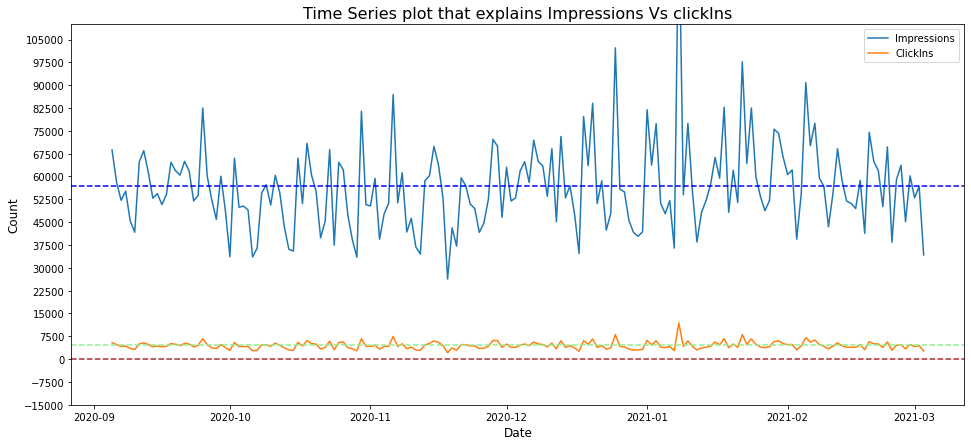

In [8]:
#plotting time series for impressions, and clickins for combining all campaigns 
timeseries_data=data[['ymd','impressions','clickins','clickout','cost','clickout_rev']].groupby(['ymd']).sum()
plt.figure(figsize=(16,7))
sns.lineplot(x=timeseries_data.index,y='impressions',data=timeseries_data,label='Impressions')
sns.lineplot(x=timeseries_data.index,y='clickins',data=timeseries_data,label='ClickIns')
plt.title('Time Series plot that explains Impressions Vs clickIns',size=16)
plt.ylabel('Count',size=12)
plt.yticks(range(-15000,120000,7500))
plt.ylim([-15000,110000])
plt.xlabel('Date',size=12)
plt.axhline( y=0, ls='--', c='brown')
plt.axhline( y=4513.527778, ls='--', c='lightgreen')
plt.axhline( y=56712.655556, ls='--', c='blue')
plt.show()

<font color=brown>**Observations:**</font><br>
<font color=darkblue> 1. The time series plot for 180 days has 56.7k the average of impressions(blue -- line) and 4.5k.  average of clickin(slight green -- line) 
<br> 2. the ratio between clickin, and impressions is around 0.1. From this it can be assumed that 1 out of 10 impressions is leading to Trivago website.
<br> 3. Before analysing which marketing campaigns are performing better, it's important to understand  `clickins`,`clickout`, `cost`,and `clickout_rev` further.

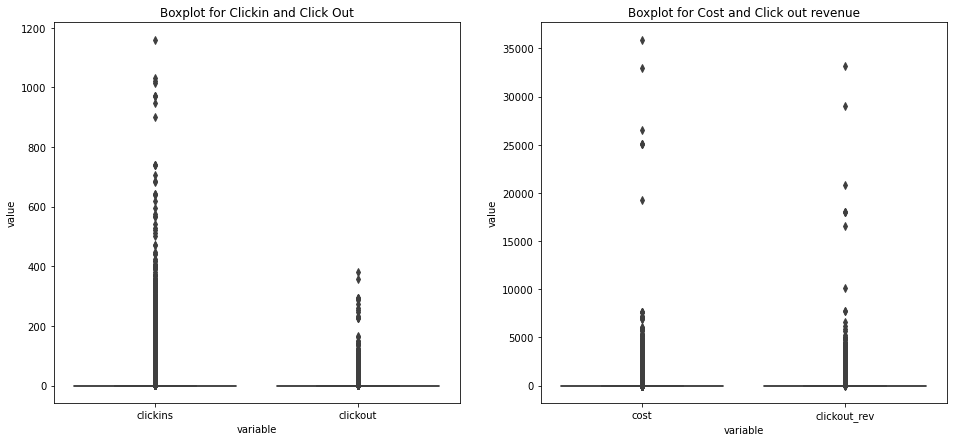

In [9]:
#Plottin box plots for clickins,clickout,cost,clickout_rev from different marketing campaigns
fig,axs=plt.subplots(1,2,figsize=(16,7))
sns.boxplot(x="variable", y="value", data=pd.melt(data[['clickins','clickout']]),ax=axs[0])
sns.boxplot(x="variable", y="value", data=pd.melt(data[['cost','clickout_rev']]),ax=axs[1])
axs[0].set_title('Boxplot for Clickin and Click Out',size=12)
axs[1].set_title('Boxplot for Cost and Click out revenue',size=12)
plt.show()

<font color=brown>**Observations:**</font><br>
<font color=darkblue> 1.The box plots indicate that clickins with 0 counts skewing the data.
<br>2. The assumption "Only 1 out of 10 impressions is navigating to Trivago website"  is true as the count of clickins is highly dense at 0. 
<br>3. Also, as clickout,cost,and clickout_rev depends on clickins, respective box plots are also skewed around 0.
<br>4. Further,If count of clickins is zero, then it is clear that clickout,cost,and clickout_rev will be 0.
<br>5. A subset of data with a minimum count of clickins is greater than 1 can be taken for a better understanding of data.

**Feature Engineering for better insights**

Introducing following features

1. **`clickins_bool`** is **`True`** if clickins>0 else **`False`**

2. $ User conversion rate=   \Bigg[\frac{Clickout}{Clickins}\Bigg]$

3. $ Return on Ad Spent (ROAS)=   \Bigg[\frac{ClickoutRev}{Cost}\Bigg]$

4. $ Keyword bidding cost =   \Bigg[\frac{Cost}{Clickins}\Bigg]$

5. $ Revenue Per Clickin =   \Bigg[\frac{ClickoutRev}{Clickins}\Bigg]$

5. $ Revenue Per ClickOut =   \Bigg[\frac{ClickoutRev}{Clickout}\Bigg]$


The conversion and ROAS are calculated when clickins >0. Because if clickins=0, then there is no conversion, cost, Return on Ad Spend. Hence the data with the count of clickins >0 is more insightful than whole data. 

In [10]:
#flag clickins_bool feature to indicate whether clickins> 1 or not
data['clickins_bool']=data['clickins'].apply(lambda x: True if x>0 else False)
#filering data where count of clickins>0
clickins_data=data[data['clickins_bool']==True]
#new features coversion, and ROAS
clickins_data['conversion']=(clickins_data['clickout']/clickins_data['clickins']).replace({ np.nan : 0 })
clickins_data['ROAS']=(clickins_data['clickout_rev']/clickins_data['cost']).replace({ np.nan : 0 })
clickins_data['bidding_cost']=(clickins_data['cost']/clickins_data['clickins']).replace({ np.nan : 0 })
clickins_data['rev_per_clickin']=(clickins_data['clickout_rev']/clickins_data['clickins']).replace({ np.nan : 0 })
clickins_data['rev_per_clickout']=(clickins_data['clickout_rev']/clickins_data['clickout']).replace({ np.nan : 0 })
print("Number of marketing campaigns where the count of clickins is zero: ",data.shape[0]-clickins_data.shape[0])

Number of marketing campaigns where the count of clickins is zero:  1104120


**Understanding User Device, Keywords, and Markets contribution for campaign**

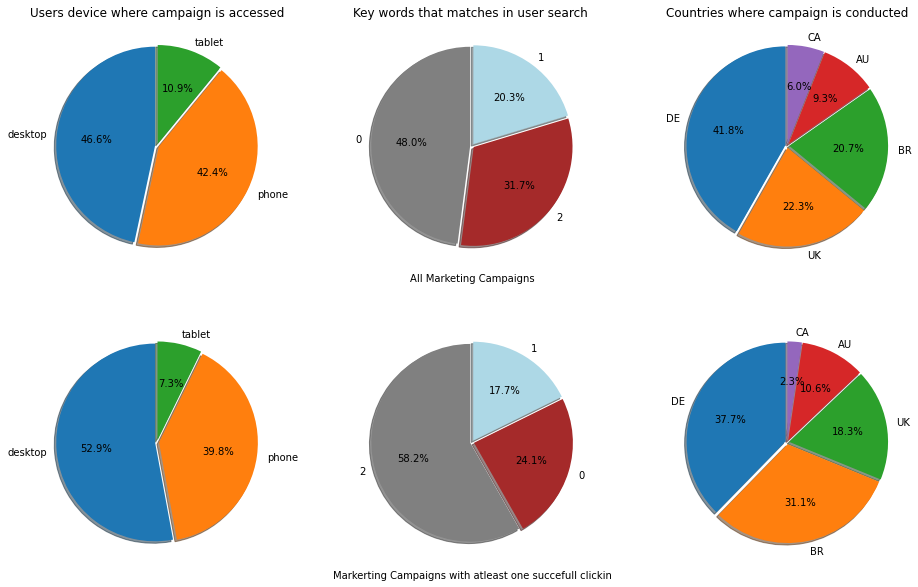

In [11]:
#Pie Charts to understand the percentation of contribution by devices,keyswords, and contries in marketing campaign
fig,axs=plt.subplots(2,3,figsize=(16,10))

data['pub_device'].value_counts().plot.pie(explode=[0.02, 0.02,0.02], autopct='%1.1f%%', shadow=True, startangle=90, ax=axs[0][0])
axs[0][0].set_title('Users device where campaign is accessed',size=12)
axs[0][0].set_ylabel('')
data['match_type'].value_counts().plot.pie(explode=[0.02, 0.02,0.02], autopct='%1.1f%%', shadow=True,colors=('grey','brown','lightblue'), ax=axs[0][1],startangle=90)
axs[0][1].set_title('Key words that matches in user search ',size=12)
axs[0][1].set_ylabel('')
axs[0][1].set_xlabel('All Marketing Campaigns')
data['market_code'].value_counts().plot.pie(explode=[0.02, 0.02,0.02,0.02,0.02], autopct='%1.1f%%', shadow=True, ax=axs[0][2],startangle=90)
axs[0][2].set_title('Countries where campaign is conducted',size=12)
axs[0][2].set_ylabel('')

clickins_data['pub_device'].value_counts().plot.pie(explode=[0.02, 0.02,0.02], autopct='%1.1f%%', shadow=True, startangle=90, ax=axs[1][0])
axs[1][0].set_ylabel('')
clickins_data['match_type'].value_counts().plot.pie(explode=[0.02, 0.02,0.02], autopct='%1.1f%%', shadow=True,colors=('grey','brown','lightblue'), ax=axs[1][1],startangle=90)
axs[1][1].set_ylabel('')
axs[1][1].set_xlabel('Markerting Campaigns with atleast one succefull clickin')
clickins_data['market_code'].value_counts().plot.pie(explode=[0.02, 0.02,0.02,0.02,0.02], autopct='%1.1f%%', shadow=True, ax=axs[1][2],startangle=90)
axs[1][2].set_ylabel('')

plt.show()

<font color=brown>**Observations:**</font><br>
<font color=darkblue>1. The campaign is quite successful on desktops, and the contribution of campaigns to access on phone, the tablet has significant fall when we consider at least one clickins.
<br>2. Even though the type 0 keyword helping users to find the trivago on SEM, the actual traffic was due to type 2 keywords.
<br>3. Germany, UK are two counties where 41%, 22.3%  of total marketing campaigns were done, but Brazil secured a successful campaign with 31.1% of total campaigns with at least one clickin compared to Germany, and the UK.
<br>4. It can be assumed that Brazil and Germany have a good market share for trivago, and it does not tell about user conversion rate and revenue. let's understand it by looking at conversion, and revenue statistics.

**Understanding campaign performance, and best performing markets**

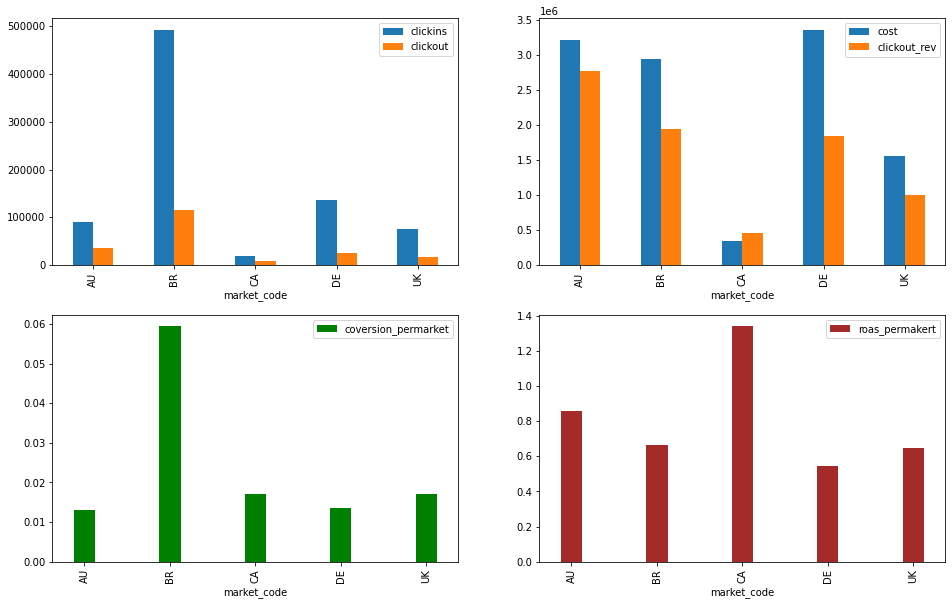

In [12]:
#Understanding campaign performance, and best performing markets
rev_sum=clickins_data[['market_code','clickins','clickout','cost','clickout_rev','conversion','ROAS']].groupby('market_code').sum()
rev_sum['coversion_permarket']=rev_sum['clickout']/rev_sum['clickout_rev']
rev_sum['roas_permakert']=rev_sum['clickout_rev']/rev_sum['cost']
rev_sum[['avg_cost_permakert','avg_clickout_rev_permakert']]=clickins_data[['cost','clickout_rev','market_code']].groupby('market_code').mean()
#rev_sum['rev_per_clickin']=rev_sum['clickout_rev']/rev_sum['clickout_rev']
rev_sum=rev_sum.reset_index()
fig,axs=plt.subplots(2,2,figsize=(16,10))
rev_sum.plot(x='market_code',y=['clickins','clickout'],kind='bar',ax=axs[0][0])
rev_sum.plot(x='market_code',y=['cost','clickout_rev'],kind='bar',ax=axs[0][1])
rev_sum.plot(x='market_code',y=['coversion_permarket'],kind='bar',ax=axs[1][0],width=0.25,color='green')
rev_sum.plot(x='market_code',y=['roas_permakert'],kind='bar',ax=axs[1][1],width=0.25,color='brown')
plt.show()

In [13]:
rev_sum

,market_code,clickins,clickout,cost,clickout_rev,conversion,ROAS,coversion_permarket,roas_permakert,avg_cost_permakert,avg_clickout_rev_permakert
0,AU,90622,36063,3212289,2763593,7284.432087,15777.237462,0.013049,0.860319,177.396123,152.617241
1,BR,492380,115757,2934681,1948928,12452.277605,36151.444698,0.059395,0.664102,55.160066,36.631919
2,CA,18987,7801,339828,455250,1654.989314,5407.116019,0.017136,1.339648,84.555362,113.274446
3,DE,135631,25097,3357324,1837248,11859.541404,35177.533093,0.013660,0.547236,52.069295,28.494184
4,UK,74815,17111,1555606,1002256,7204.889057,20424.665076,0.017072,0.644287,49.768244,32.065009


**The Pricing, add  Place are the key performance indicators that help any organization to define sustainable business strategies. Trivago generates revenue based on cost per click (CPC), and it provides services in different geographical locations. Hence I consider the conversion rate, and ROAS as KPI to understand best-performing markets.**
 
<font color=brown>**Observations:**</font><br>
<font color=darkblue> 1. AU, and CA are the two best performings, and emerging markets for Trivago because they have a higher conversation rate, and better ROAS when compared to the other two markets.
<br>2. Also, BR has a higher scope for business as many users are clickin on campaigns, but not converted. Keeping an eye and experimenting with Geographical marketing will help Trivago gain share. 
<br>3. Saturated markets like GE,UK require target-based marketing campaigns.

<font color=brown>**Key Point: Cost Vs Conversion**</font><br>
<font color=darkblue> 1. CA market has around 125% ROAS. Where a user coversion costed 84.55 cents, generated clickout_rev 113.27 cents in euro.
<br>2. To achieve 125% average ROAS, the average cost per conversion must be come down 37.45 from 53.31 cent in euro or the average clickout_rev must reached 83.30 while making sure cost per coonversion i not more than  66.64 cents in euro.

**Global avergare revenues per clickin,clickout vs Market average revenue per clickin,clickout**

Global Average revenue per click: 12.495029111328323
Global Average revenue per click: 21.29514595868785


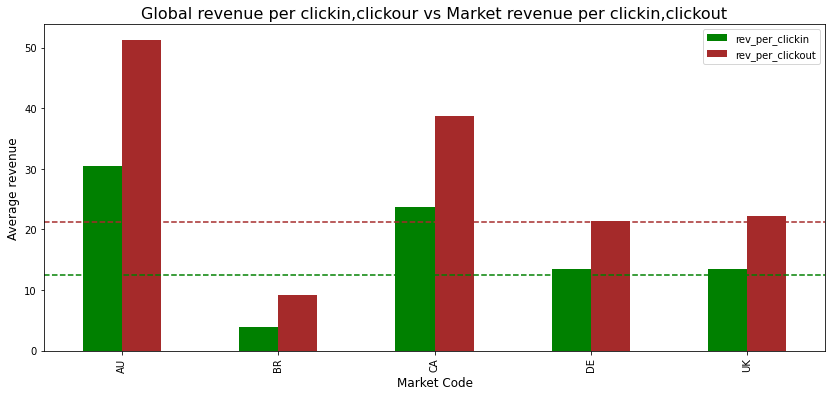

In [14]:
print('Global Average revenue per click:',clickins_data['rev_per_clickin'].mean())
print('Global Average revenue per click:',clickins_data['rev_per_clickout'].mean())
fig,axs=plt.subplots(1,1,figsize=(14,6))
clickins_data[['market_code','rev_per_clickin','rev_per_clickout']].groupby('market_code').mean().reset_index().plot(x='market_code',y=['rev_per_clickin','rev_per_clickout'],kind='bar',color=('green','brown'),ax=axs)
plt.axhline( y=12.5, ls='--', c='green')
plt.axhline( y=21.3, ls='--', c='brown')
axs.set_title('Global revenue per clickin,clickour vs Market revenue per clickin,clickout',size=16)
axs.set_xlabel('Market Code',size=12)
axs.set_ylabel('Average revenue',size=12)
plt.show()

<font color=brown>**Observations:**</font><br>
<font color=darkblue> 1. The global average revenue per clickin is 12.5 while average revenue per clickout is 21.3
<br>2. Average revenue per clinin,clickout for market CA,AU is more than gloval average
<br>3. AU market bageed top place in term of revenue per clickin,clickout, and CA emerged as second profitable market for Trivago
<br>4. Average Revenue per clickin indicates how well a trivago si performing in respective markets. Considering only the average revenue per clickout is not a great idea because clickins are shadow the true count of users engaged by trivago, but most of them are not converted. Considering both average clickin revenue, and clickout revenue would help us to improve the customer journey, and conversion rate.

**User engagement Distributions**

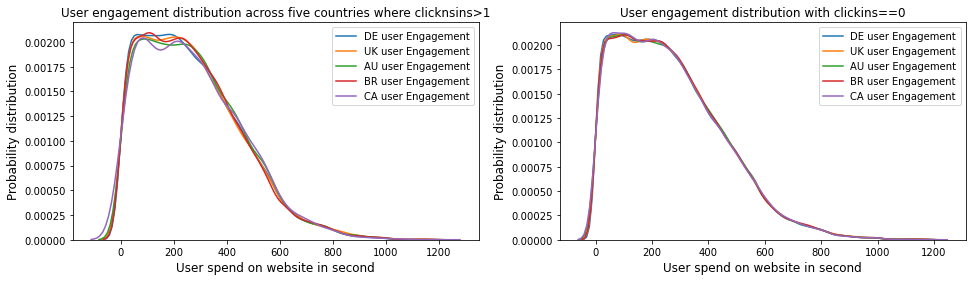

<Figure size 1008x432 with 0 Axes>

In [15]:
fig,axs=plt.subplots(1,2,figsize=(16,4))
plt.figure(figsize=(14,6))
sns.kdeplot(clickins_data[clickins_data['market_code']=='DE']['users_engagement'],label='DE user Engagement',ax=axs[0])
sns.kdeplot(clickins_data[clickins_data['market_code']=='UK']['users_engagement'],label='UK user Engagement',ax=axs[0])
sns.kdeplot(clickins_data[clickins_data['market_code']=='AU']['users_engagement'],label='AU user Engagement',ax=axs[0])
sns.kdeplot(clickins_data[clickins_data['market_code']=='BR']['users_engagement'],label='BR user Engagement',ax=axs[0])
sns.kdeplot(clickins_data[clickins_data['market_code']=='CA']['users_engagement'],label='CA user Engagement',ax=axs[0])

sns.kdeplot(data[data['market_code']=='DE']['users_engagement'],label='DE user Engagement',ax=axs[1])
sns.kdeplot(data[data['market_code']=='UK']['users_engagement'],label='UK user Engagement',ax=axs[1])
sns.kdeplot(data[data['market_code']=='AU']['users_engagement'],label='AU user Engagement',ax=axs[1])
sns.kdeplot(data[data['market_code']=='BR']['users_engagement'],label='BR user Engagement',ax=axs[1])
sns.kdeplot(data[data['market_code']=='CA']['users_engagement'],label='CA user Engagement',ax=axs[1])
axs[0].set_title('User engagement distribution across five countries where clicknsins>1')
axs[0].set_xlabel('User spend on website in second',size=12)
axs[0].set_ylabel('Probability distribution',size=12)

axs[1].set_title('User engagement distribution with clickins==0')
axs[1].set_xlabel('User spend on website in second',size=12)
axs[1].set_ylabel('Probability distribution',size=12)

plt.show()

<font color=brown>**Observations:**</font><br>
<font color=darkblue> 1. User likedly get engaged from 50 to 400 seconds on averate 
<br>2. Suprisigly, Unser engagement not correlated with place,or country as well. It has same kind of distribution acroos all the countries

**Unser engagement Vs Themes words**

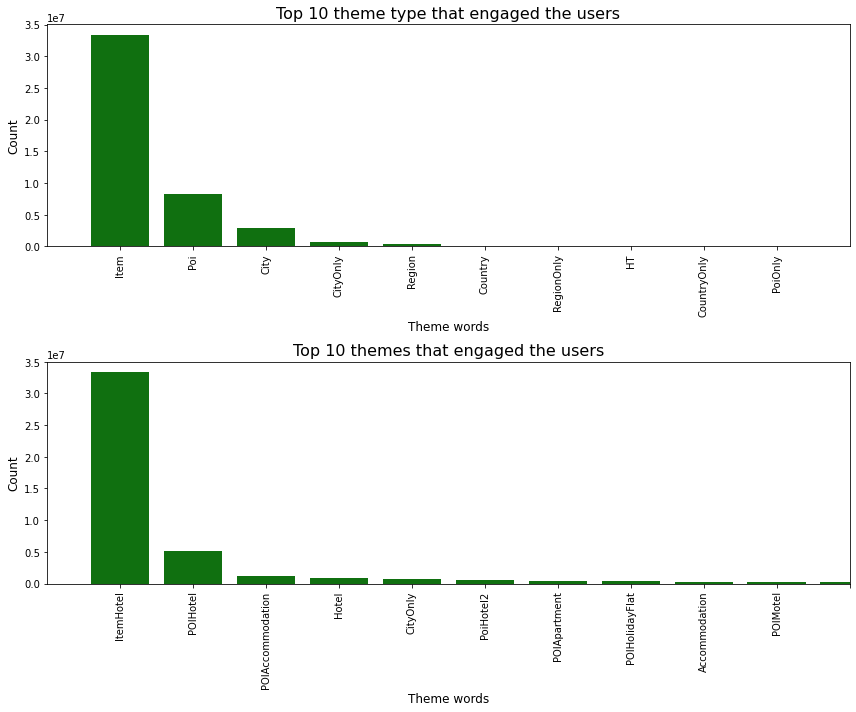

In [16]:
user_eng_theme_word=clickins_data[['theme_name_english','users_engagement']].groupby('theme_name_english').sum().sort_values('users_engagement',ascending=False).reset_index()
user_eng_theme_type=clickins_data[['replacement_type_name','users_engagement']].groupby('replacement_type_name').sum().sort_values('users_engagement',ascending=False).reset_index()
 #Top 10 themes that has high click rate
fig,axs=plt.subplots(2,1,figsize=(12,10))
sns.barplot(x='replacement_type_name',y='users_engagement',data=user_eng_theme_type,order=user_eng_theme_type['replacement_type_name'].to_list(),color="g",ax=axs[0])
axs[0].set_title("Top 10 theme type that engaged the users",size=16)
axs[0].set_ylabel('Count',size=12)
axs[0].set_xlabel('Theme words',size=12)
#axs[0].set_xticks(ticks=user_eng_theme_type['replacement_type_name'].iloc[:10,].to_list(),rotation='vertical')
axs[0].set_xlim([-1, 10])
sns.barplot(x='theme_name_english',y='users_engagement',data=user_eng_theme_word,order=user_eng_theme_word['theme_name_english'].to_list(),color="g",ax=axs[1])
axs[1].set_title("Top 10 themes that engaged the users",size=16)
axs[1].set_ylabel('Count',size=12)
axs[1].set_xlabel('Theme words',size=12)
axs[1].set_xticklabels(user_eng_theme_word['theme_name_english'].iloc[:10,].to_list())
# Rotate the tick labels and set their alignment.
plt.setp(axs[0].get_xticklabels(), rotation="90")
plt.setp(axs[1].get_xticklabels(), rotation="90")
axs[1].set_xlim([-1, 10])
plt.tight_layout()
plt.show()

<font color=brown>**Observations:**</font><br>
<font color=darkblue> 1. Item, and POI are yop theme types that engaged users the most. 
<br>2.Most of the POI realted Accomdations, Hotels, Apartment theme words with POI stood in top 10 user engagement theme words

**User engagement Vs Bookings**

In [17]:
# Feature cal
clickins_data['bookings_bool']=clickins_data['bookings'].apply(lambda x:True if x>0 else False)

Text(0, 0.5, 'KDE')

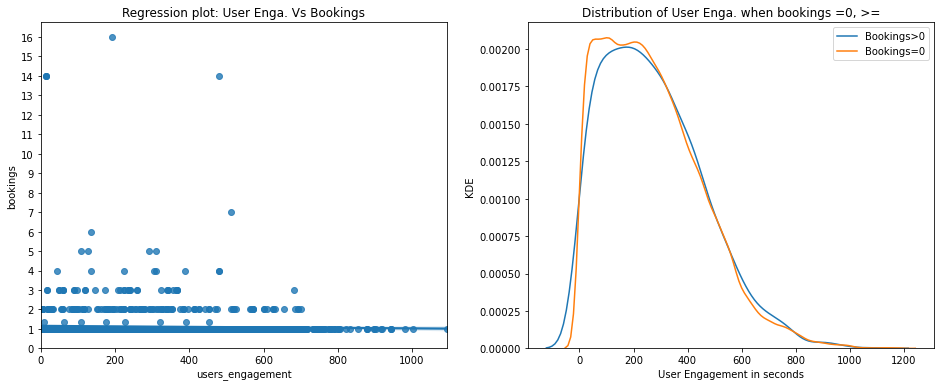

In [18]:
fig,axs=plt.subplots(1,2,figsize=(16,6))
sns.regplot(x="users_engagement", y="bookings", data=clickins_data[clickins_data['bookings_bool']==True],ax=axs[0])
axs[0].set_title('Regression plot: User Enga. Vs Bookings')
axs[0].set_yticks(range(0,17,1))
sns.kdeplot(clickins_data[clickins_data['bookings_bool']==True]['users_engagement'],ax=axs[1],label='Bookings>0')
sns.kdeplot(clickins_data[clickins_data['bookings_bool']==False]['users_engagement'],ax=axs[1],label='Bookings=0')
axs[1].set_title('Distribution of User Enga. when bookings =0, >=')
axs[1].set_xlabel('User Engagement in seconds')
axs[1].set_ylabel('KDE')

<font color=brown>**Observations:**</font><br>
<font color=darkblue> 1. constant regression line at 1, and distribution plot of user engagement tells that user spend 200 seconds on the website may or may not do booking (0.5 probability).
<br>2. If a user is engaged for 700 seconds, there is a tiny higher than booking would be done than leaving the website without booking.
<br>3. If "User engagement leads to bookings" is a hypothesis, then it is rejected as there is no evidence (both distributions have same mean, p>0.05)

### Notes on New Bidding Algorithm For AU market:
<div id="id4"></div>

A bidding Algorithm (first-party algorithm), is a custom set of bidding rules that are dynamically generated on a per-campaign basis and designed to deliver outcomes that are aligned to a specific business's goals. A smart Bidding algorithm helps organizations to achieve Target CPA, Target ROAS and Enhanced CPC

**Business Impact**
- If new bidding price algorithms work better, ROAS can be improved significantly by optimizing the cost per conversion.
- New performance indicator can be derived to make changes in current marketing strategies to gain a good market share.
- This will Maximize Clicks, improve Target Impression Share, Target CPA, Target ROAS, Maximize Conversions and Value

**Steps**  

Step 1: Estimate the Value of Each Keyword    
Step 2: Model Different Bidding Scenarios  
Step 3: Determine the Best CPC   
Step 4: Calculate Bid Modifiers   
Step 5: Anomaly Detection  
Step 6: Bid Push   

**At end**
- To check whether a particular algorithm is working as expected or not, we need to evaluate model output using t-test, Chi-Square test significances.
- To check which algorithms are performing better, A/B testing has to be done on old, and new algorithm's output data.
- Analyse the data generated by the new bidding algorithm, and extract KPI's for future marketing strategies

### Hypotheses and Click Out Revenue Prediction ML Algorithm For AU market:
<div id="id5"></div>

Before Building ML Model, Let's assume the following hypotheses for the AU market, and similar kind of hypotheses can be developed and tested for the global market as well.
- More Clickin leads to higher Clickout Revnue
- High-Cost high Clickout Revnue
- Users engagement has an impact on Clickout Revnue
- Bookings generated high clickout revenue

These are few hypotheses from the ROAS perspective but other hypotheses also can be developed following are the few examples

- Users engagement has an impact on bookings
- Improving mobile device experience lead high clickins
- Impression affect user engagement

These hypotheses can be tested using classifical statistical methods such t-test, chi-square, F1 test etc. Sometimes the features might not be statistically significant independently but when a feature is put together with other features, it may become statistically significant

The following work is done to showcase an approach to solve a business problem with help of machine learning. The Machine learning models trained here might not have converged to produce the best results. 

I have trained  ML model using approache called statistical Ordinary least SQuare (OLS) with Elastic-Net regularization

### Steps:
> **1. Data Preparation For ML Modelling**   
> **3. ML Modeling Usin OLS**  
> **4. ML Evalution**  
> **5. Results** 

**Data Pre processing for ML modelling**

In [19]:
# Filtering data for AU market between '2020-10-01' and '2020-11-30'
au_data=clickins_data[(clickins_data['ymd']>='2020-10-01')& (clickins_data['ymd']<='2020-11-30')&(clickins_data['market_code']=='AU')].copy()
inspect_data(au_data)

Data Shape:  (6202, 26)


,Data Type,No. of Unique vlaues,Unique Values,NaN Values
ymd,datetime64[ns],61,['2020-10-01T00:00:00.000000000' '2020-10-02T0...,0
market_code,category,1,"[AU]\nCategories (1, object): [AU]",0
account_id,category,4,"[391, 1127, 2475, 2303]\nCategories (4, int64)...",0
pub_campaign_id,int64,89,[ 146933719 136183279 180839726 111445508...,0
pub_adgroup_id,int64,2426,[ 20197021039 7531082479 5030484237 ... 11...,0
pub_keyword_id,int64,3145,[ 47367501 758277978 116868662132 ... 2...,0
keyword_name,object,2875,['accommodation Albany' 'Byron Bay accommodati...,0
pub_device,category,3,"[phone, desktop, tablet]\nCategories (3, objec...",0
match_type,category,3,"[1, 0, 2]\nCategories (3, int64): [1, 0, 2]",0
theme_name_english,category,24,"[Accommodation, Resort, AccommodationCheap, Ci...",0


<font color=brown>**Observations:**</font><br>
<font color=darkblue> 1. clickins_bool,market_code has no variation,pub_campaign_id,pub_adgroup_id,'pub_keyword_id' are highly variant. Hence these feature can be dropped but not mandatory
<br>2. 'conversion' is explained by clickins, and clickouts,'booking_amount' is explained by bookings, 'theme_name_english' is explained by replacement_type_name. Therefore these variable can be dropped but not mandatory.
<br>3. Few other variables are removed to avoid data leakage such as rev_per_clickin(which can't be obtained without revenue).

In [20]:
#dropping columns
data_fit=au_data.drop(['clickins_bool','bookings_bool','market_code','pub_campaign_id','pub_adgroup_id','pub_keyword_id','conversion','booking_amount','theme_name_english','keyword_name','ymd','ROAS','cost','rev_per_clickout', 'rev_per_clickin'],axis=1).copy()
X=data_fit.copy()
X.drop('clickout_rev',axis=1,inplace=True)
y=data_fit['clickout_rev']

In [21]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
#User defined function to Standardization, and ge train, and test datasets**
def get_train_test_data_std(X,y,split=0.30,stratify=False):

    if stratify==False:
        #splitting the data for validation purpose
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=123)
    else:
        #splitting the data for validation purpose
        X_train, X_test, y_train, y_test = train_test_split(X, y, stratify='y', test_size=split, random_state=1)

    #Fetching categorical and numerical columns
    cat_cols=X_train.select_dtypes('category').columns
    num_cols=X_train.columns.difference(cat_cols)

    if len(num_cols)!=0:
        #Standardizing numerical columns on complete train data
        scaler=StandardScaler()
        scaler.fit(X_train[num_cols]) 
        X_train[num_cols] = scaler.transform(X_train[num_cols]) 
        X_test[num_cols] = scaler.transform(X_test[num_cols])
    
    if len(cat_cols)!=0:
        #Dummyfying the categorical columns
        X_train=pd.get_dummies(X_train,drop_first=True)
        X_test=pd.get_dummies(X_test,drop_first=True)


    #checking extra column names for productination.
    extra_cols=list(set(X_train.columns)-set(X_test.columns))

    #dropping extra columns in both train ad validatoin data sent
    X_train.drop(extra_cols,axis=1,inplace=True)
    X_test.drop(extra_cols,axis=1,inplace=True)
    
    #remove columns with zero variance
    for col in X_train.columns:
        if len(X_train[col].unique()) == 1:
            X_train.drop(col,inplace=True,axis=1)    
    X_test=X_test[X_train.columns]
    
    return X_train,X_test,y_train,y_test

**ML Modelling: Statistical Regression Modelling For Clickout Revenue**

In [22]:
X_train, X_test, y_train, y_test=get_train_test_data_std(X,y)
X_train_ols = sm.add_constant(X_train)
X_test_ols = sm.add_constant(X_test)# adding a constant
ols_model = sm.OLS(y_train, X_train_ols).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:           clickout_rev   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 2.130e+04
Date:                Mon, 17 May 2021   Prob (F-statistic):               0.00
Time:                        22:44:10   Log-Likelihood:                -30317.
No. Observations:                5271   AIC:                         6.067e+04
Df Residuals:                    5251   BIC:                         6.081e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

<font color=brown>**Observations:**</font><br>
<font color=darkblue> 1. impressions,clickins, clickout,and bookings are statistically significant.
<br>2. Hypotheses evaluation 
- More Clickin leads to higher Clickout Revnue      : Accepted
- High-Cost high Clickout Revnue                    : Rejected
- Users engagement has an impact on Clickout Revnue : Rejected
- Bookings generated high clickout revenue          : Accepted
    
<br>3. Other features can be turned out to be statistically significant new data, feature engineering. Also, model performance can be increased with help of tuning regularization parameters.

**Model Evaluation**

In [23]:
#user define function to find F1 score for model evaluations 
y_train_pred_ols=ols_model.predict(X_train_ols)
y_test_pred_ols=ols_model.predict(X_test_ols)
print('Model evalution on Train data MSE:',mean_squared_error(y_train,y_train_pred_ols))
print('Model evalution on test data MSE :',mean_squared_error(y_test,y_test_pred_ols))

Model evalution on Train data MSE: 5799.0864970793955
Model evalution on test data MSE : 14948.743964752075


### Bidding Price Forecasting ML Algorithm For AU market:
<div id="id6"></div>

This forecasting model helps us to have base bid prices and assign starting prices for each market, campaign on resepective channels. Later apply campaign optimization algorithms to re-allocate cost per click on respective campaign and market.

The following work is done to showcase an approach to solve a business problem with help of machine learning. The Machine learning models trained here might not have converged to produce the best results. 

### Steps:
> **1. Data Preparation For Time series Fore casting**  
> **2. Forecasting Model for Bidding cost**   
> **3. Observations**   

**Data Preparation For time Series Modelling**

In [24]:
#data for timeseries forecating
timeserie_au_data=au_data[['ymd','bidding_cost']].groupby('ymd').sum()
timeserie_au_data.head(4)

,bidding_cost
ymd,
2020-10-01,4258.145426
2020-10-02,4623.625303
2020-10-03,4814.434076
2020-10-04,4457.313180


**Time Series Modelling**

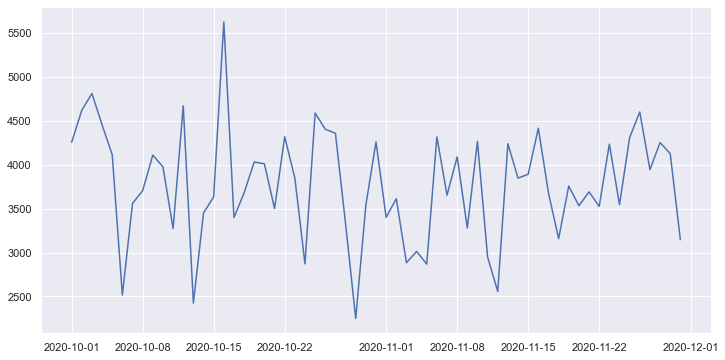

In [25]:
plt.figure(figsize=(12,6))
sns.set(style="darkgrid")
plt.plot(timeserie_au_data)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


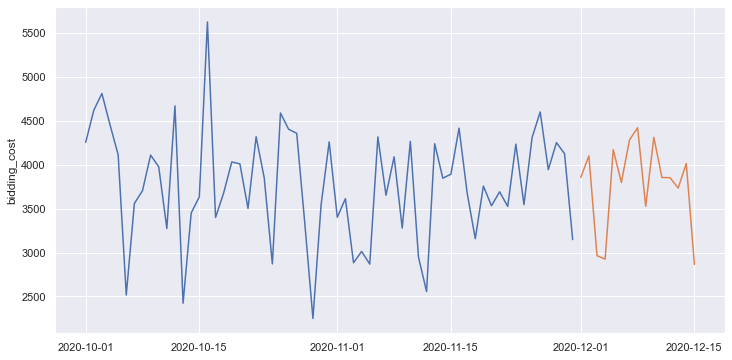

In [26]:
import statsmodels.api as sm
timeserie_au_data.index = pd.DatetimeIndex(timeserie_au_data.index.values,
                               freq=timeserie_au_data.index.inferred_freq)
model=sm.tsa.statespace.SARIMAX(timeserie_au_data['bidding_cost'],order=(2, 1, 1),seasonal_order=(2,2,1,12))
results=model.fit()
forecast=results.predict(timeserie_au_data.shape[0],end=timeserie_au_data.shape[0]+14,dynamic=True)
plt.figure(figsize=(12,6))
plt.plot(timeserie_au_data['bidding_cost'])
plt.ylabel('bidding_cost')
plt.plot(forecast)

In [27]:
pd.DataFrame(forecast,columns=['bidding_Cost']).describe()

,bidding_Cost
count,15.000000
mean,3780.491878
std,506.047713
min,2865.145344
25%,3632.151319
50%,3856.620332
75%,4138.692319
max,4423.851270


<font color=brown>**Observations:**</font><br>
<font color=darkblue>1. This forecasting model helps us to predict bidding cost for 7-14 days. 
<br>2. The average bidding cost for the next 14 days is 3780 cents in euro. Also, it is predicted that 4138 cents maximum bidding cost, and 2865 cents minimum bidding cost.

**Conclusions on ML Model building**  
1. ML model helps us to understand how features are independent, Evaluate hypotheses, and Optimize budget allocations.
2. Also, The explainability of the target variable by features play a vital role in understanding the key performing indicators for a particular campaign, design future marketing strategies, and optimizing marketing campaigns cost.
3. In OLS Regression modeling, the important features can be defined based on how a variable is explaining the target variable. In the summary of the OLS model, if a feature's `p less than 0.05`, then is statistically significant, and the target variable is predicted with p% by chance, also we can reject or accept hypothesis defined on these variables. 
4. In Random Forest feature importance, the importance of feature calculates how many times a particular variable acted as a root node in a tree structure. There is no rule that the important features obtained by Random forest should same as the statically significant features of the OLS model.

### Optional Notes:
<div id="id7"></div>

### Bidding Price Prediction Using Random Forest

The following work is done to showcase an approach to solve a business problem with help of machine learning. The Machine learning models trained here might not have converged to produce the best results. 

Random Forest Regressor (Ensemble) algorithms

**Data Pre processing for ML modelling using Random Forest**

In [28]:
au_data.head(4)

,ymd,market_code,account_id,pub_campaign_id,pub_adgroup_id,pub_keyword_id,keyword_name,pub_device,match_type,theme_name_english,...,clickout_rev,booking_amount,users_engagement,clickins_bool,conversion,ROAS,bidding_cost,rev_per_clickin,rev_per_clickout,bookings_bool
188023,2020-10-01,AU,391,146933719,20197021039,47367501,accommodation Albany,phone,1,Accommodation,...,91,0.0,18,True,1.0,2.459459,37.0,91.0,91.0,False
188503,2020-10-01,AU,391,136183279,7531082479,758277978,Byron Bay accommodation,desktop,0,Accommodation,...,93,0.0,240,True,1.0,2.513514,37.0,93.0,93.0,False
188659,2020-10-01,AU,1127,180839726,5030484237,116868662132,resort Magnetic Island,desktop,1,Resort,...,0,0.0,292,True,0.0,0.000000,38.0,0.0,0.0,False
189087,2020-10-01,AU,391,11144550863,110175954460,852691817023,accommodation kununurra cheap,desktop,1,AccommodationCheap,...,0,0.0,131,True,0.0,0.000000,39.0,0.0,0.0,False


<font color=brown>**Observations:**</font><br>
<font color=darkblue> 1. clickins_bool,market_code has no variation,pub_campaign_id,pub_adgroup_id,'pub_keyword_id' are highly variant. Hence these feature can be dropped but not mandatory
<br>2. 'users_engagement' can be assumed to be independed, 'conversion' is explained by clickins, and clickouts,'booking_amount' is explained by bookings, 'theme_name_english' is explained by replacement_type_name. Therefore these variable can be dropped but not mandatory.
<br>3. Few other variables are removed to avoid data leakage .

In [29]:
#dropping columns and preparing data
data_fit=au_data.drop(['clickins_bool','bookings_bool','market_code','pub_campaign_id','pub_adgroup_id','pub_keyword_id','users_engagement','conversion','booking_amount','theme_name_english','keyword_name','ymd','ROAS','cost'],axis=1).copy()
X=data_fit.copy()
X.drop('bidding_cost',axis=1,inplace=True)
y=data_fit['bidding_cost']
#splitting the data for validation purpose
X_train, X_test, y_train, y_test = get_train_test_data_std(X, y)

**Bidding Cost ML modelling Using For Random Forest**

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score,KFold,GridSearchCV
#Defining parameter grid
param_grid = { "n_estimators" :range(70,100,10)}

# Estimate the score on the entire dataset, with no missing values
skf = KFold(n_splits=8) 
clf = GridSearchCV(RandomForestRegressor(random_state=125,min_samples_leaf=2),param_grid, scoring="neg_mean_squared_error", n_jobs=10 ,cv=skf) 
clf.fit(X=X_train,y=y_train) 

#selecting best model in Grid Search
model = clf.best_estimator_ 
print(clf.best_score_, clf.best_params_)

-3.211216086187352 {'n_estimators': 90}


**Model Evaluation**

In [31]:
#user define function to find F1 score for model evaluations 
y_train_pred_rf=model.predict(X_train)
y_test_pred_rf=model.predict(X_test)
print('Model evalution on Train data (MSE): ',mean_squared_error(y_train,y_train_pred_rf))
print('Model evalution on test data( MSE): ', mean_squared_error(y_test,y_test_pred_rf))

Model evalution on Train data (MSE):  1.2089490345985905
Model evalution on test data( MSE):  3.419554060441577


**Important feature Indicators**

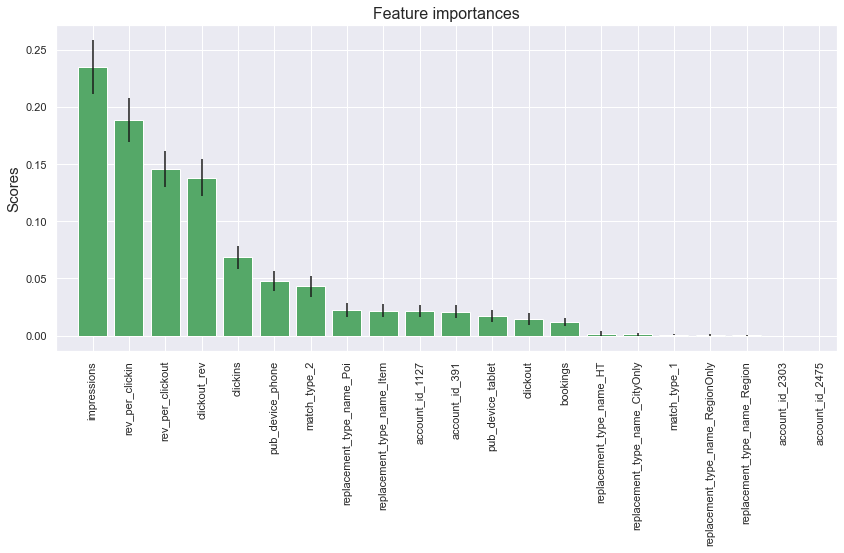

In [32]:
#Sorting the features based on the score
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],axis=0)
indices=np.argsort(importances)[::-1]
featName=X_train.columns

# Plot the feature importances of the forest 
top=indices[:20] #top 20
plt.figure(figsize=(14,6))
plt.title("Feature importances",size=16)
plt.bar(range(X_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.ylabel('Scores',size=15)
plt.xticks(range(X_train.shape[1]), featName[indices],rotation='vertical')
plt.xlim([-1, 20.5])
plt.show()